# [Overrandomized](https://codingcompetitions.withgoogle.com/codejam/round/000000000019fef4/00000000003179a1)

# Analyze
## Input
- Given an integer M
    + return a random number in range [1, M]
    + All digit is encoded as a string len 10. Eg:
        + `CODEJAMFUN` ->
        + C = 0, O = 1, D = 2

## Intuition 1
- Probability to see digit 1,2,3,...,9, 0 decreasing
    - Most appeared character -> digit 1
    - 2nd Most appeared character -> digit 2
    - ...
    - Least appeared character -> digit 0

#### Simulate

In [43]:
from random import randint
from collections import defaultdict


def simulate(U, N=10000):
    '''U = number of digit'''
    # count digit appearances
    digit_cnt = defaultdict(int)
    
    for n in range(1000):
        M = randint(1, 10**U-1)
        R = randint(1, M)
        
        for digit in str(R):
            digit_cnt[int(digit)] += 1
    
    # Sort by appearances
    return {k: v for k, v in sorted(digit_cnt.items(), key=lambda item: item[1], reverse=True)}


def plot_data(data: defaultdict(int)):
    from matplotlib import pyplot as plt
    
    plt.bar(
        x=range(len(data)), height=list(data.values()),
        align='center')

    plt.xticks(
        ticks=range(len(data)),
        labels=list(data.keys()))

    plt.show()

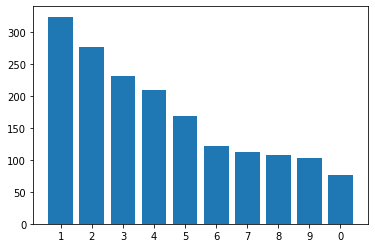

In [45]:
# 1 - 99
digit_cnt = simulate(2)
plot_data(digit_cnt)

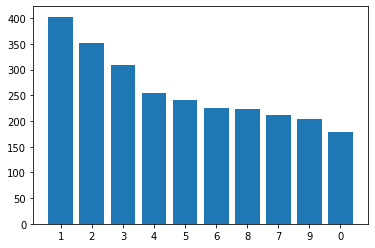

In [46]:
# 1 - 999
digit_cnt = simulate(3)
plot_data(digit_cnt)

## Intuition 2
- Probability to see digit 1,2,3,...,9 decreasing sharply as we just consider only leftmost (leading) digit
- 0 wont appear

#### Simulate

In [47]:
from random import randint
from collections import defaultdict


def simulate(U, N=10000):
    '''U = number of digit'''
    # count digit appearances
    digit_cnt = defaultdict(int)
    
    for n in range(1000):
        M = randint(1, 10**U-1)
        R = randint(1, M)
        
        digit_cnt[int(str(R)[0])] += 1
    
    # Sort by appearances
    return {k: v for k, v in sorted(digit_cnt.items(), key=lambda item: item[1], reverse=True)}


def plot_data(data: defaultdict(int)):
    from matplotlib import pyplot as plt
    
    plt.bar(
        x=range(len(data)), height=list(data.values()),
        align='center')

    plt.xticks(
        ticks=range(len(data)),
        labels=list(data.keys()))

    plt.show()

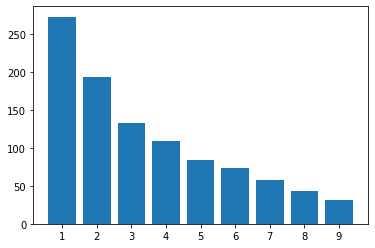

In [48]:
# 1 - 99
digit_cnt = simulate(2)
plot_data(digit_cnt)

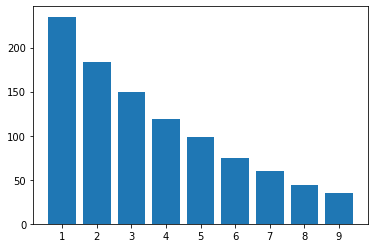

In [49]:
# 1 - 999
digit_cnt = simulate(3)
plot_data(digit_cnt)

# Solution

```cpp
int U;
vector<int> Q;
vector<string> R;
void readInput() {
    cin >> U;
    Q.resize(10000);
    R.resize(10000);
    for(int i=0; i<10000; ++i) {
        cin >> Q[i] >> R[i];
    }
}


string sol() {
    unordered_map<char, int> cnt;
    for(auto &s:R) {
        cnt[s[0]] += 1;
    }

    vector<pair<char, int>> tmp(cnt.begin(), cnt.end());
    sort(tmp.begin(), tmp.end(), [](pair<char, int> &a, pair<char, int> &b){return a.second > b.second;});

    unordered_set<char> is_in;
    string ans(10, '?');
    for(int i=1; i<10; ++i) {
        ans[i] = tmp[i-1].first;
        is_in.insert(tmp[i-1].first);
    }

    for(string &r:R) for(char &c:r) {
        if(is_in.count(c) == NULL) {
            ans[0] = c;
            break;
        }
    }

    return ans;
}


void solve(unsigned long long fdfsfv_t) {
    cout << "Case #" << fdfsfv_t  << ": " << sol() << endl;
}
```